# Limitation of DTFT [Q1]
Concepts to read: Stationary v/s Non-stationary
- Record audio with fs=16 kHz, 16bit.
- plot time and frequency magnitude spectrum [linear and log].
- What information is lost when applying the Discrete-Time Fourier Trans- form (DTFT) to an entire signal


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import scipy.io.wavfile as wav
import sounddevice as sd
import torchaudio

In [2]:
file_path = "audio_16.wav"
fs, audio = wav.read(file_path)
print(f"Sample Rate: {fs} Hz")
print(f"Data Type: {audio.dtype}")

Sample Rate: 16000 Hz
Data Type: int16


In [3]:
from IPython.display import Audio
Audio(audio, rate=fs)

In [4]:
# Load and plot the time-domain signal
def plot_time_signal(audio, fs):
    time = np.linspace(0, len(audio) / fs, num=len(audio))
    plt.figure(figsize=(10, 4))
    plt.plot(time, audio)
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.title("Time-Domain Signal")
    plt.show()

In [12]:
# Compute DTFT and plot magnitude spectrum
def plot_dtft(audio, fs):
    N = len(audio)
    freqs = np.fft.fftfreq(N, d=1/fs)
    spectrum = np.fft.fft(audio)
    plt.figure(figsize=(10, 4))
    plt.plot(freqs[:N//2], np.abs(spectrum[:N//2]))
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.title("DTFT Magnitude Spectrum (Linear Scale)")
    plt.show()

    plt.figure(figsize=(10, 4))
    plt.semilogy(freqs[:N//2], np.abs(spectrum[:N//2]))
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude (Log Scale)")
    plt.title("DTFT Magnitude Spectrum (Log Scale)")
    plt.show()

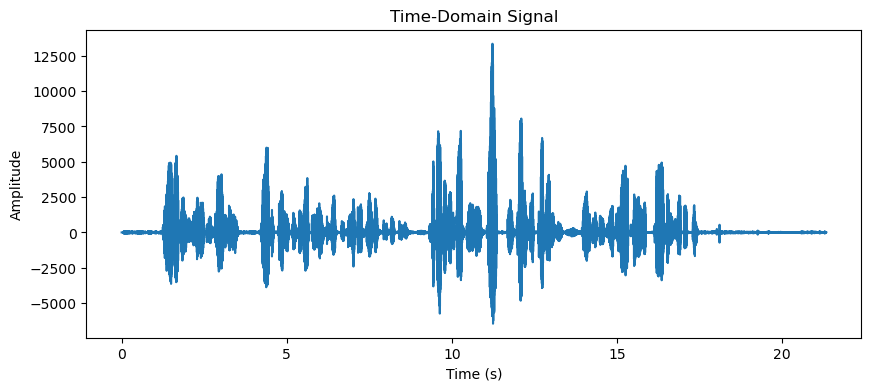

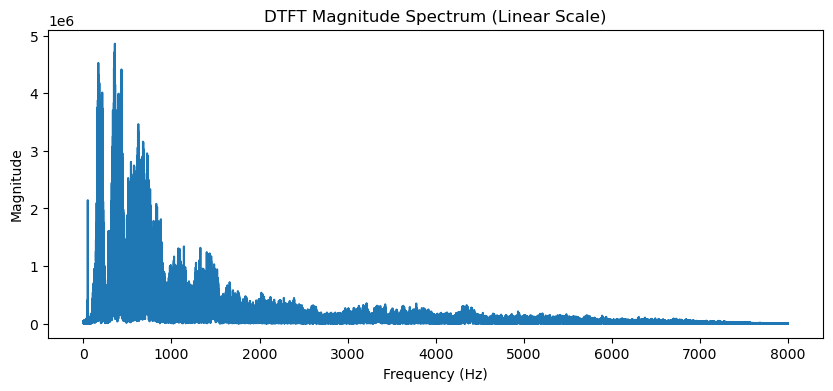

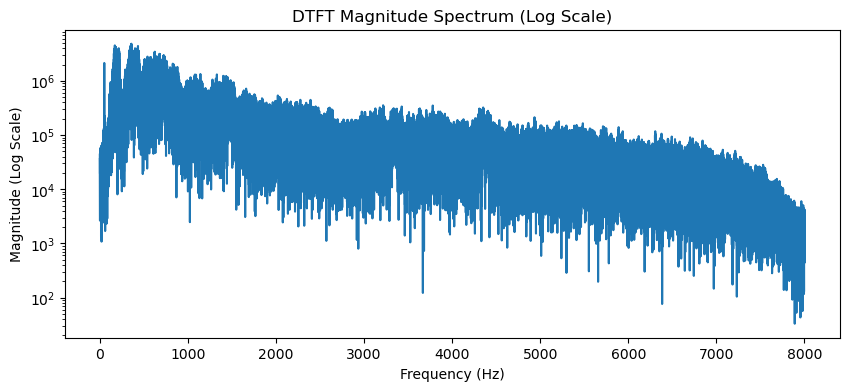

In [13]:
# Main Execution
plot_time_signal(audio, fs)
plot_dtft(audio, fs)

- A signal is stationary if its statistical properties (such as mean, variance, and autocorrelation) do not change over time. Example: A pure sine wave with constant amplitude and frequency.
- A signal is non-stationary if its statistical properties change over time. Example: Speech signals, where pitch and amplitude vary over time.

## What info is lost ?
- As this is a non-stationary signal, after DTFT, following happened
    - This does not give a specific time information. Here the signals goes from normal to higher frequency and then low. It won't indicate when the shift occurred.
    - Not able to understand frequencies at specific time. It gives an overall impression.

# Spectrogram [Q2]
Concepts to read: Framing, Frame size/Hop size, STFT
- Extract 30 ms of voiced segment and plot its waveform and frequency magnitude spectrum (linear and log).
- Extract 30 ms of unvoiced segment and plot its waveform and frequency magnitude spectrum (linear and log).
- Extract 30 ms of silence and plot its waveform and frequency spectrum (linear and log).
- Plot the STFT spectrogram of the full audio.

In [21]:
voiced_segment = audio[int(3.0 * fs): int(3.03 * fs)] ## Voiced - AAJ
unvoiced_segment = audio[int(9.0 * fs): int(9.03 * fs)] ## Unvoiced - Shakal
silenced_segment = audio[int(0.0 * fs): int(0.03 * fs)] ## Silence

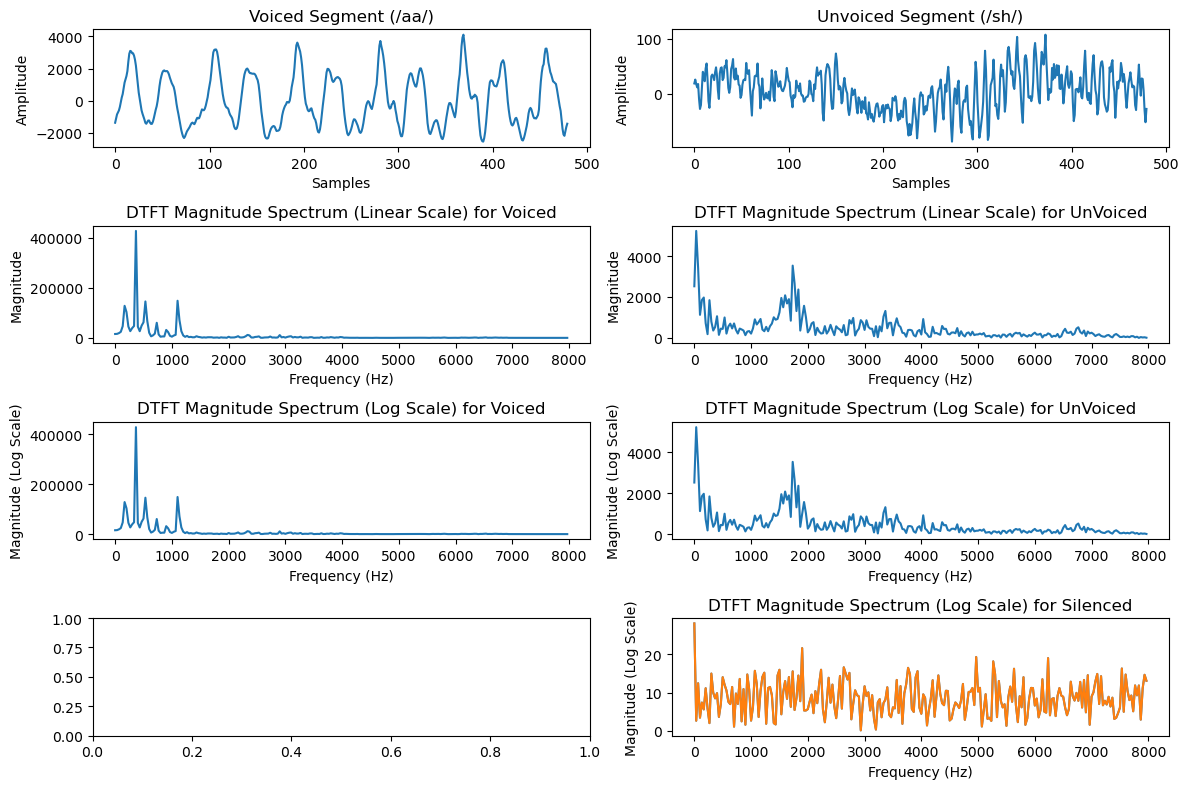

In [22]:
fig, axs = plt.subplots(4, 2, figsize=(12, 8))

axs[0, 0].plot(voiced_segment)
axs[0, 0].set_title("Voiced Segment (/aa/)")
axs[0, 0].set_xlabel("Samples")
axs[0, 0].set_ylabel("Amplitude")

axs[0, 1].plot(unvoiced_segment)
axs[0, 1].set_title("Unvoiced Segment (/sh/)")
axs[0, 1].set_xlabel("Samples")
axs[0, 1].set_ylabel("Amplitude")


N = len(voiced_segment)
freqs = np.fft.fftfreq(N, d=1/fs)
spectrum = np.fft.fft(voiced_segment)
axs[1, 0].plot(freqs[:N//2], np.abs(spectrum[:N//2]))
axs[1, 0].set_xlabel("Frequency (Hz)")
axs[1, 0].set_ylabel("Magnitude")
axs[1, 0].set_title("DTFT Magnitude Spectrum (Linear Scale) for Voiced")

axs[2, 0].plot(freqs[:N//2], np.abs(spectrum[:N//2]))
axs[2, 0].set_xlabel("Frequency (Hz)")
axs[2, 0].set_ylabel("Magnitude (Log Scale)")
axs[2, 0].set_title("DTFT Magnitude Spectrum (Log Scale) for Voiced")



N = len(unvoiced_segment)
freqs = np.fft.fftfreq(N, d=1/fs)
spectrum = np.fft.fft(unvoiced_segment)
axs[1, 1].plot(freqs[:N//2], np.abs(spectrum[:N//2]))
axs[1, 1].set_xlabel("Frequency (Hz)")
axs[1, 1].set_ylabel("Magnitude")
axs[1, 1].set_title("DTFT Magnitude Spectrum (Linear Scale) for UnVoiced")

axs[2, 1].plot(freqs[:N//2], np.abs(spectrum[:N//2]))
axs[2, 1].set_xlabel("Frequency (Hz)")
axs[2, 1].set_ylabel("Magnitude (Log Scale)")
axs[2, 1].set_title("DTFT Magnitude Spectrum (Log Scale) for UnVoiced")

N = len(silenced_segment)
freqs = np.fft.fftfreq(N, d=1/fs)
spectrum = np.fft.fft(silenced_segment)
axs[3, 1].plot(freqs[:N//2], np.abs(spectrum[:N//2]))
axs[3, 1].set_xlabel("Frequency (Hz)")
axs[3, 1].set_ylabel("Magnitude")
axs[3, 1].set_title("DTFT Magnitude Spectrum (Linear Scale) for Silenced")

axs[3, 1].plot(freqs[:N//2], np.abs(spectrum[:N//2]))
axs[3, 1].set_xlabel("Frequency (Hz)")
axs[3, 1].set_ylabel("Magnitude (Log Scale)")
axs[3, 1].set_title("DTFT Magnitude Spectrum (Log Scale) for Silenced")

plt.tight_layout()
plt.show()



In [29]:
# Compute and plot STFT spectrogram
def plot_spectrogram(audio, fs, window_type='hann'):
    f, t, Sxx = signal.spectrogram(audio, fs, window=window_type)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud')
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.title(f"Spectrogram using {window_type} Window")
    plt.colorbar(label='Power (dB)')
    plt.show()

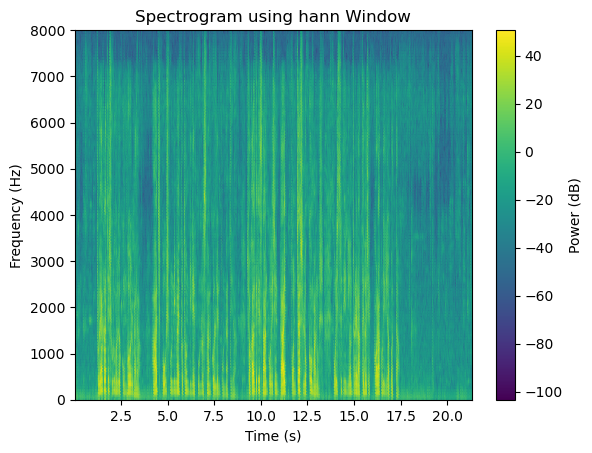

In [30]:
plot_spectrogram(audio, fs, 'hann')

# Concepts to read: Rectangular, Hamming, Hanning window
Repeat the above [Q2] experiment using Hamming and Hanning windows, then record the observations.

- Rectangular Windows - No smoothing → abrupt cutoff, High spectral leakage due to discontinuities.
- Hamming - Reduces spectral leakage significantly.
- Hann - Similar to Hamming but with stronger smoothing.

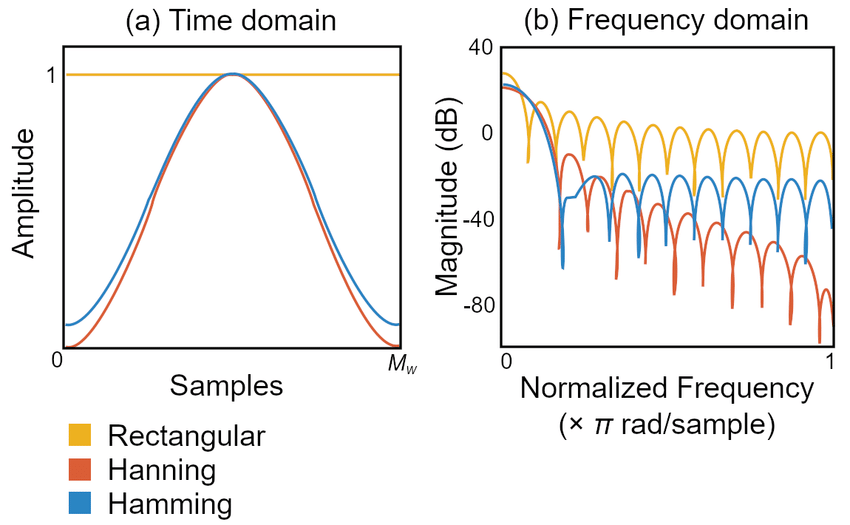

# Voices Segments

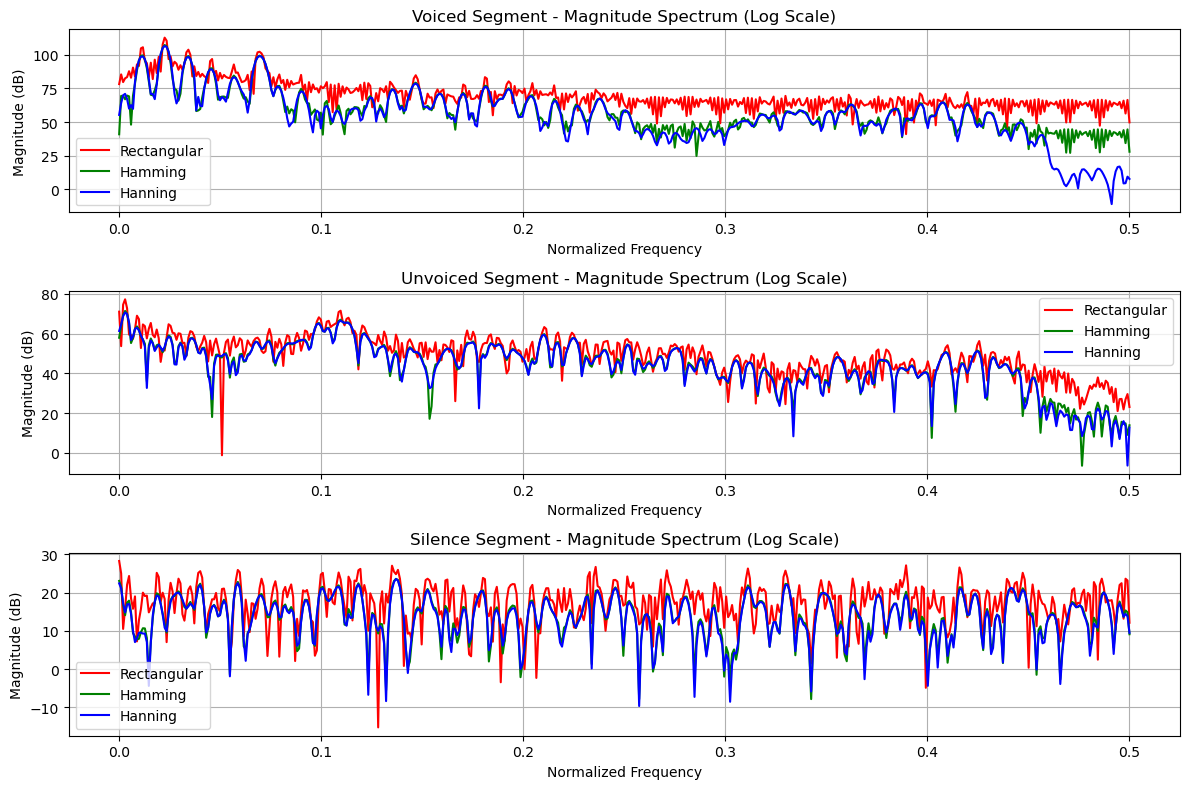

In [39]:
# Define window length
N = len(voiced_segment)
n = np.arange(N)

# Generate windows
rectangular = np.ones(N)
hamming = np.hamming(N)
hanning = np.hanning(N)

voiced_segment = audio[int(3.01 * fs): int(3.04 * fs)] ## Voiced - AAJ
unvoiced_segment = audio[int(9.01 * fs): int(9.04 * fs)] ## Unvoiced - Shakal
silenced_segment = audio[int(0.01 * fs): int(0.04 * fs)] ## Silence

# Apply windows
voiced_rect = voiced_segment * rectangular
voiced_hamm = voiced_segment * hamming
voiced_hann = voiced_segment * hanning

unvoiced_rect = unvoiced_segment * rectangular
unvoiced_hamm = unvoiced_segment * hamming
unvoiced_hann = unvoiced_segment * hanning

silence_rect = silenced_segment * rectangular
silence_hamm = silenced_segment * hamming
silence_hann = silenced_segment * hanning

# Compute FFT and normalize
voiced_fft_rect = np.abs(fft(voiced_rect, 1024))[:512]
voiced_fft_hamm = np.abs(fft(voiced_hamm, 1024))[:512]
voiced_fft_hann = np.abs(fft(voiced_hann, 1024))[:512]

unvoiced_fft_rect = np.abs(fft(unvoiced_rect, 1024))[:512]
unvoiced_fft_hamm = np.abs(fft(unvoiced_hamm, 1024))[:512]
unvoiced_fft_hann = np.abs(fft(unvoiced_hann, 1024))[:512]

silence_fft_rect = np.abs(fft(silence_rect, 1024))[:512]
silence_fft_hamm = np.abs(fft(silence_hamm, 1024))[:512]
silence_fft_hann = np.abs(fft(silence_hann, 1024))[:512]

# Convert to log magnitude scale
voiced_fft_rect = 20 * np.log10(voiced_fft_rect + 1e-10)
voiced_fft_hamm = 20 * np.log10(voiced_fft_hamm + 1e-10)
voiced_fft_hann = 20 * np.log10(voiced_fft_hann + 1e-10)

unvoiced_fft_rect = 20 * np.log10(unvoiced_fft_rect + 1e-10)
unvoiced_fft_hamm = 20 * np.log10(unvoiced_fft_hamm + 1e-10)
unvoiced_fft_hann = 20 * np.log10(unvoiced_fft_hann + 1e-10)

silence_fft_rect = 20 * np.log10(silence_fft_rect + 1e-10)
silence_fft_hamm = 20 * np.log10(silence_fft_hamm + 1e-10)
silence_fft_hann = 20 * np.log10(silence_fft_hann + 1e-10)

# Frequency axis
freq = np.linspace(0, 0.5, len(voiced_fft_rect))

# Plot spectrums for Voiced segment
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(freq, voiced_fft_rect, 'r', label="Rectangular")
plt.plot(freq, voiced_fft_hamm, 'g', label="Hamming")
plt.plot(freq, voiced_fft_hann, 'b', label="Hanning")
plt.title("Voiced Segment - Magnitude Spectrum (Log Scale)")
plt.xlabel("Normalized Frequency")
plt.ylabel("Magnitude (dB)")
plt.legend()
plt.grid()

# Plot spectrums for Unvoiced segment
plt.subplot(3, 1, 2)
plt.plot(freq, unvoiced_fft_rect, 'r', label="Rectangular")
plt.plot(freq, unvoiced_fft_hamm, 'g', label="Hamming")
plt.plot(freq, unvoiced_fft_hann, 'b', label="Hanning")
plt.title("Unvoiced Segment - Magnitude Spectrum (Log Scale)")
plt.xlabel("Normalized Frequency")
plt.ylabel("Magnitude (dB)")
plt.legend()
plt.grid()

# Plot spectrums for Silence segment
plt.subplot(3, 1, 3)
plt.plot(freq, silence_fft_rect, 'r', label="Rectangular")
plt.plot(freq, silence_fft_hamm, 'g', label="Hamming")
plt.plot(freq, silence_fft_hann, 'b', label="Hanning")
plt.title("Silence Segment - Magnitude Spectrum (Log Scale)")
plt.xlabel("Normalized Frequency")
plt.ylabel("Magnitude (dB)")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


- In case of Voiced Segments, the Hanning window captures the finest details, the Hamming the finer and the rectangular window the normal details.
- In case of Unvoiced segment, for the lower magnitude spectrum, the Hamming window captures finer details.
- In case of silence the hamming window does not capture any info.

# Consider x[n] as a 300 ms voiced segment, and define y[n] = x[n]·w[n] for the following cases. 
# For each case, plot the time-domain signal and the frequency magnitude spectrum (both linear and logarithmic):

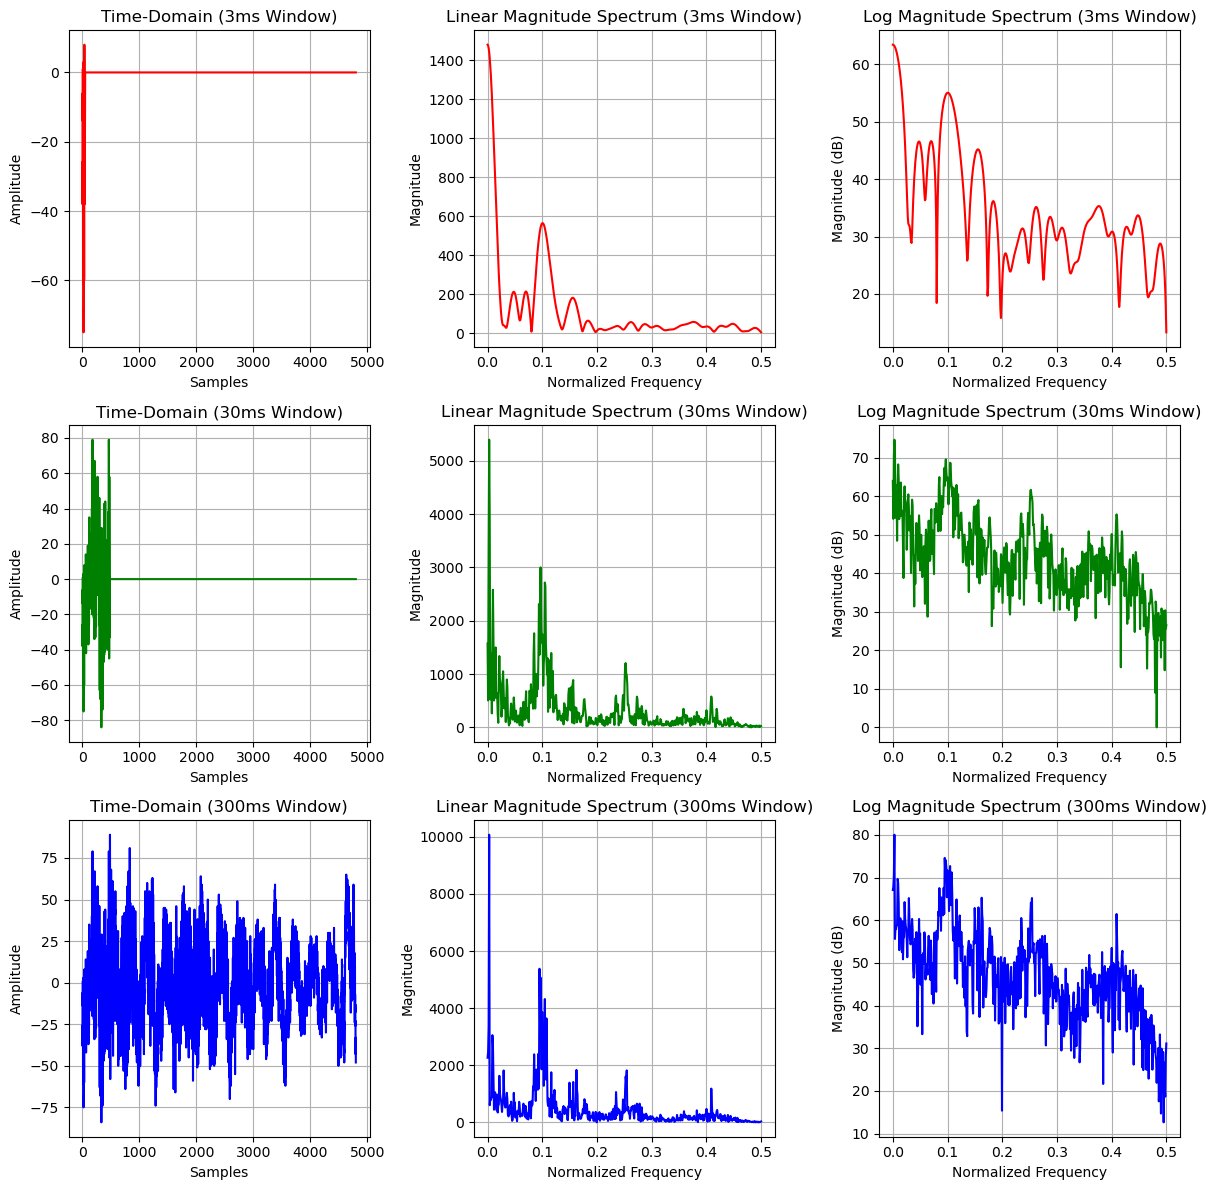

In [43]:
# Extract a 300 ms voiced segment
voiced_segment = audio[int(0.5 * fs): int(0.8 * fs)]
N = len(voiced_segment)
n = np.arange(N)

# Define windows
w1 = np.zeros(N)
w1[:int(0.003 * fs)] = 1  # 3 ms window

w2 = np.zeros(N)
w2[:int(0.03 * fs)] = 1  # 30 ms window

w3 = np.ones(N)  # Full window (300 ms)

# Apply windows
y1 = voiced_segment * w1
y2 = voiced_segment * w2
y3 = voiced_segment * w3

# Compute FFT and normalize
Y1 = np.abs(fft(y1, 1024))[:512]
Y2 = np.abs(fft(y2, 1024))[:512]
Y3 = np.abs(fft(y3, 1024))[:512]

# Convert to log scale
Y1_log = 20 * np.log10(Y1 + 1e-10)
Y2_log = 20 * np.log10(Y2 + 1e-10)
Y3_log = 20 * np.log10(Y3 + 1e-10)

# Frequency axis
freq = np.linspace(0, 0.5, len(Y1))

# Plot time-domain signals
plt.figure(figsize=(12, 12))
plt.subplot(3, 3, 1)
plt.plot(n, y1, 'r')
plt.title("Time-Domain (3ms Window)")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.grid()

plt.subplot(3, 3, 4)
plt.plot(n, y2, 'g')
plt.title("Time-Domain (30ms Window)")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.grid()

plt.subplot(3, 3, 7)
plt.plot(n, y3, 'b')
plt.title("Time-Domain (300ms Window)")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.grid()

# Plot linear magnitude spectra
plt.subplot(3, 3, 2)
plt.plot(freq, Y1, 'r')
plt.title("Linear Magnitude Spectrum (3ms Window)")
plt.xlabel("Normalized Frequency")
plt.ylabel("Magnitude")
plt.grid()

plt.subplot(3, 3, 5)
plt.plot(freq, Y2, 'g')
plt.title("Linear Magnitude Spectrum (30ms Window)")
plt.xlabel("Normalized Frequency")
plt.ylabel("Magnitude")
plt.grid()

plt.subplot(3, 3, 8)
plt.plot(freq, Y3, 'b')
plt.title("Linear Magnitude Spectrum (300ms Window)")
plt.xlabel("Normalized Frequency")
plt.ylabel("Magnitude")
plt.grid()

# Plot log magnitude spectra
plt.subplot(3, 3, 3)
plt.plot(freq, Y1_log, 'r')
plt.title("Log Magnitude Spectrum (3ms Window)")
plt.xlabel("Normalized Frequency")
plt.ylabel("Magnitude (dB)")
plt.grid()

plt.subplot(3, 3, 6)
plt.plot(freq, Y2_log, 'g')
plt.title("Log Magnitude Spectrum (30ms Window)")
plt.xlabel("Normalized Frequency")
plt.ylabel("Magnitude (dB)")
plt.grid()

plt.subplot(3, 3, 9)
plt.plot(freq, Y3_log, 'b')
plt.title("Log Magnitude Spectrum (300ms Window)")
plt.xlabel("Normalized Frequency")
plt.ylabel("Magnitude (dB)")
plt.grid()

plt.tight_layout()
plt.show()


- All the graphs gives an idea of the frequency curves. With smller duration also the frquency curve is quite similar.
- The 300ms frequency captures more denser information.
- A short window (3 ms) results in a broad frequency spectrum with significant spreading, as short segments contain fewer harmonic details. A medium window (30 ms) produces a more defined spectral representation but still introduces some spectral leakage. A longer window (300 ms) gives the best frequency resolution, accurately capturing the harmonic structure of voiced speech.